In [218]:
import pandas as pd
import matplotlib.pyplot as plt

In [219]:
df = pd.read_csv("./Dataset salary 2024.csv")

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [221]:
df.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [222]:
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              155
salary                2560
salary_currency         23
salary_in_usd         2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

In [223]:
df["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [224]:
df["work_year"].value_counts()

work_year
2023    8519
2024    6067
2022    1655
2021     218
2020      75
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

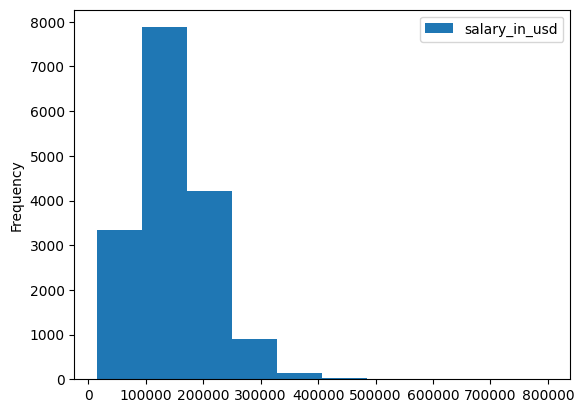

In [225]:
df.plot(kind="hist", x="work_year", y="salary_in_usd")

In [226]:
df_2020 = df.loc[df["work_year"] == 2020]
df_2020_en = df_2020 = df_2020.loc[df_2020["experience_level"] == "EN"]
df_2020_en.describe()
mean_2020_en = df_2020_en["salary_in_usd"].mean()

In [227]:
df["remote_ratio"].value_counts()
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


<Axes: >

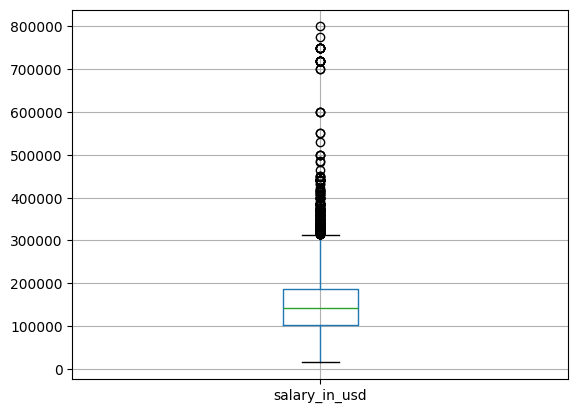

In [228]:
df.boxplot(column="salary_in_usd")

185900.0 101125.0


<Axes: >

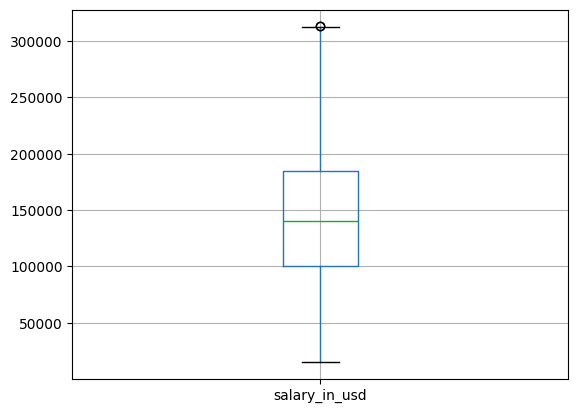

In [229]:
q1_quant = df["salary_in_usd"].quantile(.25)
q3_quant = df["salary_in_usd"].quantile(.75)
print(q3_quant,q1_quant)
outlier = q3_quant+1.5*(q3_quant-q1_quant)
idx_drop = df[df["salary_in_usd"] > outlier].index.to_list()
df_better = df.drop(axis=0,index=idx_drop)
df_better.boxplot(column="salary_in_usd")

mean            std
                            salary_in_usd  salary_in_usd
experience_level work_year                              
EN               2020        69840.666667   51593.547260
                 2021        63463.065217   38303.117102
                 2022        80018.698276   46920.552025
                 2023        91166.310345   49462.135344
                 2024        97882.789086   53870.503380
EX               2020       179958.250000  155652.841196
                 2021       186128.000000  101365.169627
                 2022       188260.292683   61289.314424
                 2023       191314.194215   70591.310534
                 2024       202105.808824   68211.966143
MI               2020        91870.935484   73915.351114
                 2021        86818.390805   61500.266728
                 2022       102745.576602   48219.146586
                 2023       123821.311772   63018.918365
                 2024       134803.995664   71818.902595
SE               2020       138648.894737   88766.467048
                 2021       125989.746667   62717.098965
                 2022       147903.354697   53432.098870
                 2023       165421.026078   61064.006675
                 2024       166815.831737   70856.217980

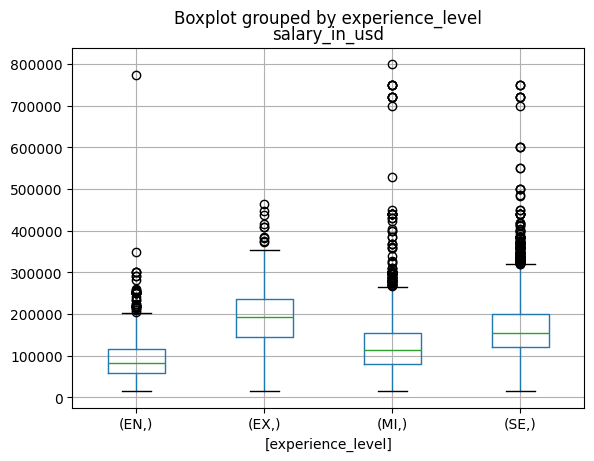

In [230]:
#multivariate analysis Experience level Salaries

piv_table = df.pivot_table(
    values = ['salary_in_usd'],
    index = ['experience_level', 'work_year'],
    aggfunc=['mean', 'std']
)

df.boxplot(column=["salary_in_usd"], by=['experience_level'])
display(piv_table)

116000.0 58000.0


mean            std
                            salary_in_usd  salary_in_usd
experience_level work_year                              
EN               2020        60832.700000   31753.680036
                 2021        59873.355556   29903.915483
                 2022        80018.698276   46920.552025
                 2023        85517.230425   40282.457179
                 2024        92732.198485   39726.275262
EX               2020       179958.250000  155652.841196
                 2021       160586.666667   64963.167220
                 2022       188260.292683   61289.314424
                 2023       188588.012552   66510.133683
                 2024       195818.611111   58492.574968
MI               2020        79933.300000   32891.007485
                 2021        80708.235294   45712.527604
                 2022       101828.756983   45044.347904
                 2023       119175.098633   50128.092647
                 2024       127305.009471   50237.049928
SE               2020       123462.722222   60856.029866
                 2021       125989.746667   62717.098965
                 2022       146717.847308   51000.112764
                 2023       162403.723925   56115.089952
                 2024       160267.720308   56816.408792

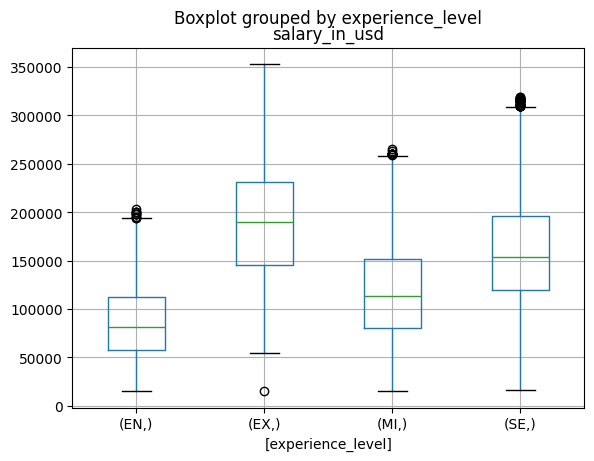

In [231]:
q1_quant_en = df[(df["experience_level"] == "EN")]["salary_in_usd"].quantile(.25)
q3_quant_en = df[(df["experience_level"] == "EN")]["salary_in_usd"].quantile(.75)
print(q3_quant_en, q1_quant_en)
outlier_en = q3_quant_en+1.5*(q3_quant_en-q1_quant_en)
drp_idx = df[(df["experience_level"] == "EN") & (df["salary_in_usd"] > outlier_en)].index.to_list()
df.drop(axis=0,index=drp_idx,inplace=True)

q1_quant_ex = df[(df["experience_level"] == "EX")]["salary_in_usd"].quantile(.25)
q3_quant_ex = df[(df["experience_level"] == "EX")]["salary_in_usd"].quantile(.75)
outlier_ex = q3_quant_ex+1.5*(q3_quant_ex-q1_quant_ex)
drp_idx = df[(df["experience_level"] == "EX") & (df["salary_in_usd"] > outlier_ex)].index.to_list()
df.drop(axis=0,index=drp_idx,inplace=True)

q1_quant_mi = df[(df["experience_level"] == "MI")]["salary_in_usd"].quantile(.25)
q3_quant_mi = df[(df["experience_level"] == "MI")]["salary_in_usd"].quantile(.75)
outlier_mi = q3_quant_mi+1.5*(q3_quant_mi-q1_quant_mi)
drp_idx = df[(df["experience_level"] == "MI") & (df["salary_in_usd"] > outlier_mi)].index.to_list()
df.drop(axis=0,index=drp_idx,inplace=True)

q1_quant_se = df[(df["experience_level"] == "SE")]["salary_in_usd"].quantile(.25)
q3_quant_se = df[(df["experience_level"] == "SE")]["salary_in_usd"].quantile(.75)
outlier_se = q3_quant_se+1.5*(q3_quant_se-q1_quant_se)
drp_idx = df[(df["experience_level"] == "SE") & (df["salary_in_usd"] > outlier_se)].index.to_list()
df.drop(axis=0,index=drp_idx,inplace=True)

piv_table = df.pivot_table(
    values = ['salary_in_usd'],
    index = ['experience_level', 'work_year'],
    aggfunc=['mean', 'std']
)

df.boxplot(column="salary_in_usd", by=['experience_level'])
display(piv_table)